 ### Hotel Rating Classification 

Business Objective:
	Extract reviews from trip advisor and ratings for different hotels and our goal is to examine how travellers are communicating their positive and negative experiences in online platforms for staying in a specific hotel and major objective is what are the attributes that travellers are considering while selecting a hotel. With this manager can understand which elements of their hotel influence more in forming a positive review or improves hotel brand image.


#### IMPORTING DEPENDENCIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string # special operations on strings
import spacy # language models
%matplotlib inline

In [2]:
data=pd.read_csv('project_data.csv')

In [3]:
data.head()

,Reviews
0,fancy hotel missing amenities hubby arrived df...
1,supeb business hotel overnighted hotel think t...
2,"great hyatt stay, stayed dfw grand hyatt secon..."
3,wonderful stay highly recommend stayed omni 21...
4,comfortable stay isolated problem min-bar char...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  2125 non-null   object
dtypes: object(1)
memory usage: 16.7+ KB


In [5]:
data.shape

(2125, 1)

In [6]:
data.head()

,Reviews
0,fancy hotel missing amenities hubby arrived df...
1,supeb business hotel overnighted hotel think t...
2,"great hyatt stay, stayed dfw grand hyatt secon..."
3,wonderful stay highly recommend stayed omni 21...
4,comfortable stay isolated problem min-bar char...


In [7]:
data.tail()

,Reviews
2120,fantastic stayed 4 nights celebrate 10th weddi...
2121,outstanding hotel transport hotel rolls royce ...
2122,service wanted meet friend hk dinner booked we...
2123,disappointing peninsula time vacation time jap...
2124,hte best world staying peninsula just fantasti...


In [8]:
data.describe()

,Reviews
count,2125
unique,2125
top,"trip lifetime, 2 girls halifax nova scotia 25 ..."
freq,1


### EDA and Data Cleaning

In [9]:
data.duplicated().sum()

0

In [10]:
data.isna().sum()

Reviews    0
dtype: int64

In [11]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [12]:
data['Reviews'] = data.Reviews.apply(clean)
data.Reviews

0       fancy hotel missing amenities hubby arrived df...
1       supeb business hotel overnighted hotel think t...
2       great hyatt stay stayed dfw grand hyatt second...
3       wonderful stay highly recommend stayed omni  w...
4       comfortable stay isolated problem minbar charg...
                              ...                        
2120    fantastic stayed  nights celebrate  wedding an...
2121    outstanding hotel transport hotel rolls royce ...
2122    service wanted meet friend hk dinner booked we...
2123    disappointing peninsula time vacation time jap...
2124    hte best world staying peninsula just fantasti...
Name: Reviews, Length: 2125, dtype: object

In [13]:
data

,Reviews
0,fancy hotel missing amenities hubby arrived df...
1,supeb business hotel overnighted hotel think t...
2,great hyatt stay stayed dfw grand hyatt second...
3,wonderful stay highly recommend stayed omni w...
4,comfortable stay isolated problem minbar charg...
...,...
2120,fantastic stayed nights celebrate wedding an...
2121,outstanding hotel transport hotel rolls royce ...
2122,service wanted meet friend hk dinner booked we...
2123,disappointing peninsula time vacation time jap...


In [14]:
#Word frequency
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:20] # for top 20
freq

hotel      4519
not        3942
room       3608
nt         2367
great      2226
good       1879
did        1843
beach      1815
staff      1663
stay       1621
nice       1497
no         1451
just       1435
resort     1328
food       1305
service    1286
time       1276
rooms      1233
day        1202
stayed     1088
dtype: int64

In [15]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [16]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:20] # for top 20
freq_Sw

hotel      4519
room       3608
nt         2367
great      2226
good       1879
beach      1815
staff      1663
stay       1621
nice       1497
resort     1328
food       1305
service    1286
time       1276
rooms      1233
day        1202
stayed     1088
night      1076
pool       1033
like        967
clean       960
dtype: int64

In [17]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Reviews"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [18]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aaa,16,0.000069
1,aaaaa,1,0.000004
2,aavacationscom,1,0.000004
3,aback,1,0.000004
4,abandoned,3,0.000013
5,abbey,1,0.000004
6,abc,14,0.000060
7,abide,1,0.000004
8,ability,6,0.000026
9,abit,1,0.000004


In [19]:
word_freq_df.tail(30)

,term,occurrences,frequency
19830,zillions,1,0.000004
19831,zipline,1,0.000004
19832,zipped,2,0.000009
19833,zippered,1,0.000004
19834,zipping,1,0.000004
19835,zoe,1,0.000004
19836,zone,4,0.000017
19837,zoo,17,0.000073
19838,zoolike,1,0.000004
19839,zoological,1,0.000004


In [20]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Reviews"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [21]:
df

,able,absolutely,ac,access,activities,actually,additional,adequate,adults,advance,...,worse,worst,worth,write,wrong,year,years,yes,york,young
0,0.0,0.0,0.0,0.000000,0.0,0.085627,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.109077,0.000000,0.000000,0.0,0.0,0.0,0.11096
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.000000,0.0,0.081200,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.092268,0.075026,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.069438,0.0,0.0,0.0,0.00000
2121,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000
2122,0.0,0.0,0.0,0.107264,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.089691,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000
2123,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000


### N-gram

In [22]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [23]:
top2_words = get_top_n2_words(data["Reviews"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,ca nt,218
1,punta cana,215
2,staff friendly,209
3,san juan,208
4,new york,204


### BI-gram

[Text(0, 0, 'ca nt'),
 Text(1, 0, 'punta cana'),
 Text(2, 0, 'staff friendly'),
 Text(3, 0, 'san juan'),
 Text(4, 0, 'new york'),
 Text(5, 0, 'great location'),
 Text(6, 0, 'room service'),
 Text(7, 0, 'hotel great'),
 Text(8, 0, 'walking distance'),
 Text(9, 0, 'friendly helpful'),
 Text(10, 0, 'times square'),
 Text(11, 0, 'great time'),
 Text(12, 0, 'great hotel'),
 Text(13, 0, 'room clean'),
 Text(14, 0, 'puerto rico'),
 Text(15, 0, 'highly recommend'),
 Text(16, 0, 'ocean view'),
 Text(17, 0, 'make sure'),
 Text(18, 0, 'great place'),
 Text(19, 0, 'food good')]

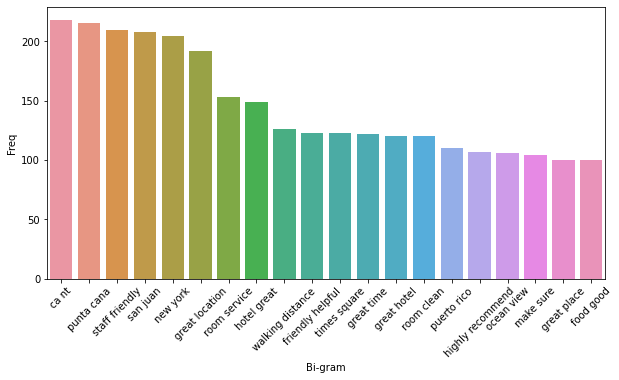

In [24]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

### Tri-gram

In [25]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [26]:
top3_words = get_top_n3_words(data["Reviews"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [27]:
top3_df

,Tri-gram,Freq
0,old san juan,90
1,staff friendly helpful,56
2,hotel great location,49
3,ocean view room,36
4,king size bed,35
...,...,...
195,marriott waikiki beach,6
196,room floor room,5
197,nt sure expect,5
198,expect pleasantly surprised,5


[Text(0, 0, 'old san juan'),
 Text(1, 0, 'staff friendly helpful'),
 Text(2, 0, 'hotel great location'),
 Text(3, 0, 'ocean view room'),
 Text(4, 0, 'king size bed'),
 Text(5, 0, 'punta cana grand'),
 Text(6, 0, 'empire state building'),
 Text(7, 0, 'ca nt wait'),
 Text(8, 0, 'hilton times square'),
 Text(9, 0, 'westin rio mar'),
 Text(10, 0, 'highly recommend hotel'),
 Text(11, 0, 'great place stay'),
 Text(12, 0, 'new york city'),
 Text(13, 0, 'ca nt beat'),
 Text(14, 0, 'great hotel great'),
 Text(15, 0, 'flat screen tv'),
 Text(16, 0, 'maison st charles'),
 Text(17, 0, 'barcelo bavaro beach'),
 Text(18, 0, 'stayed hotel nights'),
 Text(19, 0, 'returned night stay')]

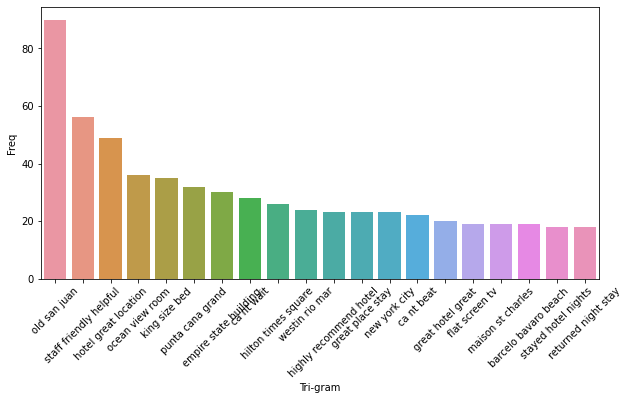

In [28]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

### Worldcloud

In [29]:
string_Total = " ".join(data["Reviews"])

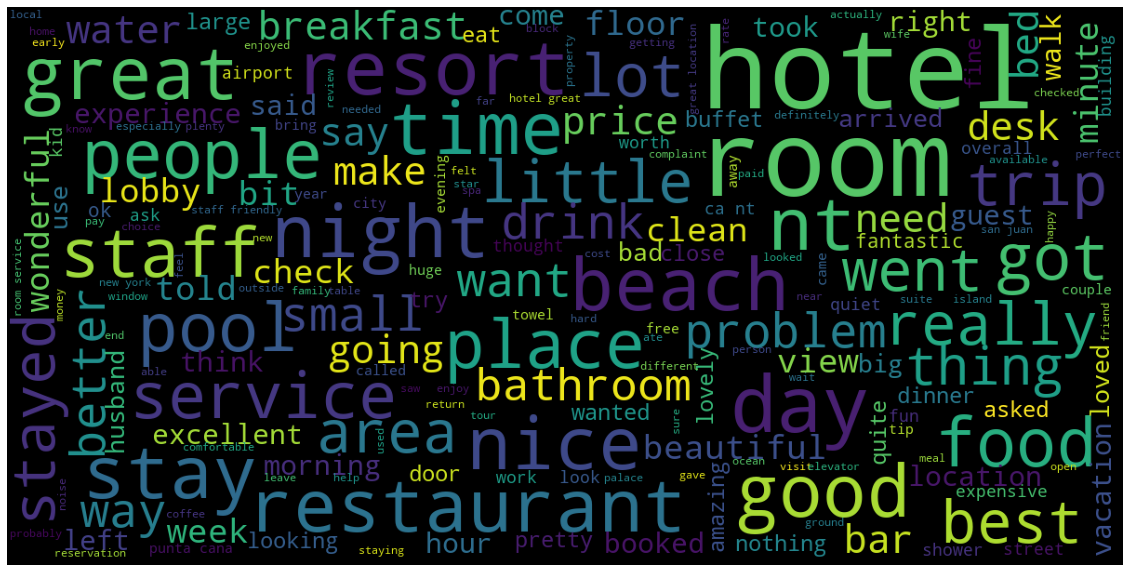

In [30]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(string_Total)

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data["Reviews"])

###  ***Most of the words are indeed related to the hotels: room, staff, breakfast, restaurant,bar,pool etc. Some words are more related to the customer experience with the hotel stay: perfect, loved, expensive, dislike,bad,clean,service,problrm etc*** 
.

# Sentiment Analysis

  Sentiment Analysis is the use of natural language processing, text, analysis, computational linguistics and 
biometrics to systematically identify, extract, quantify and study affective states and subjective information. It is the natural language processing technique used to determine whether data is positive or negative.

In [31]:
data['Reviews']

0       fancy hotel missing amenities hubby arrived df...
1       supeb business hotel overnighted hotel think t...
2       great hyatt stay stayed dfw grand hyatt second...
3       wonderful stay highly recommend stayed omni we...
4       comfortable stay isolated problem minbar charg...
                              ...                        
2120    fantastic stayed nights celebrate wedding anni...
2121    outstanding hotel transport hotel rolls royce ...
2122    service wanted meet friend hk dinner booked we...
2123    disappointing peninsula time vacation time jap...
2124    hte best world staying peninsula fantastic exp...
Name: Reviews, Length: 2125, dtype: object

In [32]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/isiri/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
#converting to lower case
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Reviews']

0       fancy hotel missing amenities hubby arrived df...
1       supeb business hotel overnighted hotel think t...
2       great hyatt stay stayed dfw grand hyatt second...
3       wonderful stay highly recommend stayed omni we...
4       comfortable stay isolated problem minbar charg...
                              ...                        
2120    fantastic stayed nights celebrate wedding anni...
2121    outstanding hotel transport hotel rolls royce ...
2122    service wanted meet friend hk dinner booked we...
2123    disappointing peninsula time vacation time jap...
2124    hte best world staying peninsula fantastic exp...
Name: Reviews, Length: 2125, dtype: object

In [34]:
#Remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Reviews']

[nltk_data] Downloading package stopwords to /home/isiri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       fancy hotel missing amenities hubby arrived df...
1       supeb business hotel overnighted hotel think t...
2       great hyatt stay stayed dfw grand hyatt second...
3       wonderful stay highly recommend stayed omni we...
4       comfortable stay isolated problem minbar charg...
                              ...                        
2120    fantastic stayed nights celebrate wedding anni...
2121    outstanding hotel transport hotel rolls royce ...
2122    service wanted meet friend hk dinner booked we...
2123    disappointing peninsula time vacation time jap...
2124    hte best world staying peninsula fantastic exp...
Name: Reviews, Length: 2125, dtype: object

In [35]:
#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data['Reviews']

0       fanci hotel miss amen hubbi arriv dfw airport ...
1       supeb busi hotel overnight hotel think that pr...
2       great hyatt stay stay dfw grand hyatt second t...
3       wonder stay highli recommend stay omni wed ann...
4       comfort stay isol problem minbar charg hotel g...
                              ...                        
2120    fantast stay night celebr wed anniversari wife...
2121    outstand hotel transport hotel roll royc niceg...
2122    servic want meet friend hk dinner book weekend...
2123    disappoint peninsula time vacat time japanes f...
2124    hte best world stay peninsula fantast experi s...
Name: Reviews, Length: 2125, dtype: object

In [36]:
#Sentiment score
data['scores'] = data['Reviews'].apply(lambda text: sia.polarity_scores(text))
data['scores']

0       {'neg': 0.046, 'neu': 0.737, 'pos': 0.216, 'co...
1       {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...
2       {'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com...
3       {'neg': 0.02, 'neu': 0.708, 'pos': 0.272, 'com...
4       {'neg': 0.045, 'neu': 0.743, 'pos': 0.213, 'co...
                              ...                        
2120    {'neg': 0.025, 'neu': 0.861, 'pos': 0.114, 'co...
2121    {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...
2122    {'neg': 0.039, 'neu': 0.719, 'pos': 0.242, 'co...
2123    {'neg': 0.051, 'neu': 0.813, 'pos': 0.136, 'co...
2124    {'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'comp...
Name: scores, Length: 2125, dtype: object

In [37]:
#Compound score
data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['compound']

0       0.9806
1       0.9584
2       0.9928
3       0.9817
4       0.9694
         ...  
2120    0.9618
2121    0.6808
2122    0.9806
2123    0.9360
2124    0.9938
Name: compound, Length: 2125, dtype: float64

In [38]:
data['label'] = data['compound'].apply(lambda x: 'positive' if x >=0.00 else 'negative')
data['label']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
2120    positive
2121    positive
2122    positive
2123    positive
2124    positive
Name: label, Length: 2125, dtype: object

In [39]:
data.head()

,Reviews,scores,compound,label
0,fanci hotel miss amen hubbi arriv dfw airport ...,"{'neg': 0.046, 'neu': 0.737, 'pos': 0.216, 'co...",0.9806,positive
1,supeb busi hotel overnight hotel think that pr...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.9584,positive
2,great hyatt stay stay dfw grand hyatt second t...,"{'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com...",0.9928,positive
3,wonder stay highli recommend stay omni wed ann...,"{'neg': 0.02, 'neu': 0.708, 'pos': 0.272, 'com...",0.9817,positive
4,comfort stay isol problem minbar charg hotel g...,"{'neg': 0.045, 'neu': 0.743, 'pos': 0.213, 'co...",0.9694,positive


In [40]:
data_pos=data[data['label']=='positive']
data_pos.shape

(1970, 4)

In [41]:
data_neg=data[data['label']=='negative']
data_neg.shape

(155, 4)

In [42]:
data['label'].value_counts()

positive    1970
negative     155
Name: label, dtype: int64

<AxesSubplot:>

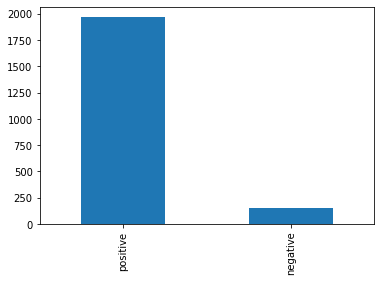

In [43]:
data['label'].value_counts().plot(kind='bar')

# Wordcloud to see frequent usage of words

In [44]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Positive Sentiment Wordcloud')

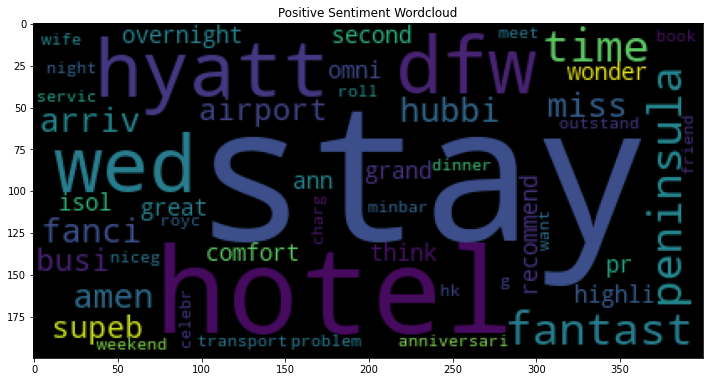

In [45]:
cloud=WordCloud(max_words=50,stopwords=stopwords.words("english")).generate(str(data_pos["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)
plt.title('Positive Sentiment Wordcloud')

Text(0.5, 1.0, 'Negative Sentiment Wordcloud')

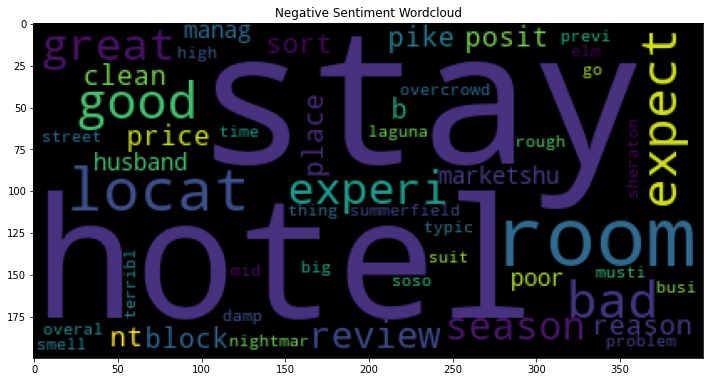

In [46]:
cloud=WordCloud(max_words=50,stopwords=stopwords.words("english")).generate(str(data_neg["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)
plt.title('Negative Sentiment Wordcloud')

# MULTINOMIAL NAIVE-BAYES MODEL(without balancing)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Reviews'])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['label'], test_size=0.3, random_state=1)

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9090909090909091


# MULTINOMIAL NAIVE-BAYES MODEL(using TF-IDF)

In [50]:
#Using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Reviews'])

In [51]:
from sklearn.model_selection import train_test_split
X_trainNB, X_testNB, y_trainNB, y_testNB = train_test_split(text_tf, data['label'], test_size=0.3, random_state=123)

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_trainNB, y_trainNB)
predicted= clf.predict(X_testNB)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_testNB, predicted))

MultinomialNB Accuracy: 0.9216300940438872


# MULTINOMIAL NAIVE-BAYES MODEL(using TF-IDF and balancing using SMOTE)

SMOTE(Synthetic Minority Oversampling Technique) is a statistical technique for increasing the number of cases 
in your dataset in a balanced way. The module works by generating new instances from existing minority cases 
that you supply as input.

In [53]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(text_tf, data['label'])

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (2125, 19860)
Shape of X after SMOTE: (3940, 15279)

Balance of positive and negative classes (%):


positive    50.0
negative    50.0
Name: label, dtype: float64

In [54]:
X_trainNB_bal,X_testNB_bal,y_trainNB_bal,y_testNB_bal=train_test_split(X_sm,y_sm,test_size=0.3,random_state=1)

clf = MultinomialNB().fit(X_trainNB_bal, y_trainNB_bal)
predict= clf.predict(X_testNB_bal)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_testNB_bal, predict))

MultinomialNB Accuracy: 0.9593908629441624


# Logistic Model (without balancing)

In [55]:
# Logistic model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_trainLOG,X_testLOG,Y_trainLOG,Y_testLOG=train_test_split(text_tf,data['label'],test_size=0.3,random_state=1)

logreg=LogisticRegression()
logreg.fit(X_trainLOG,Y_trainLOG)

y_pred=logreg.predict(X_testLOG)
print("Logistics Model Accuracy:",metrics.accuracy_score(Y_testLOG, y_pred))

Logistics Model Accuracy: 0.9090909090909091


# Logistic Model (with balancing using SMOTE)

In [56]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(text_tf, data['label'])

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (2125, 19860)
Shape of X after SMOTE: (3940, 15279)

Balance of positive and negative classes (%):


positive    50.0
negative    50.0
Name: label, dtype: float64

In [57]:
X_trainLOG_bal,X_testLOG_bal,y_trainLOG_bal,y_testLOG_bal=train_test_split(X_sm,y_sm,test_size=0.3,random_state=1)

clf = MultinomialNB().fit(X_trainLOG_bal, y_trainLOG_bal)
pred= clf.predict(X_testLOG_bal)
print("Logistics model Accuracy:",metrics.accuracy_score(y_testLOG_bal, pred))

Logistics model Accuracy: 0.9593908629441624


# RANDOM FOREST(without balancing)

Random Forest Model Accuracy: 0.9090909090909091


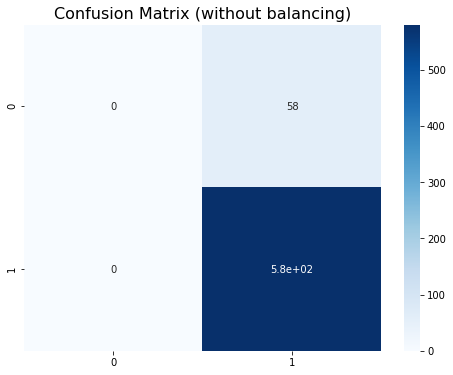

In [58]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

X_trainRF,X_testRF,Y_trainRF,Y_testRF=train_test_split(text_tf,data['label'],test_size=0.3,random_state=1)

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_trainRF, Y_trainRF)
preds = model.predict(X_testRF)

print("Random Forest Model Accuracy:",metrics.accuracy_score(Y_testRF, preds))

# Evaluate
cm = confusion_matrix(Y_testRF, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without balancing)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');


# RANDOM FOREST Model with Feature engineering(SMOTE)

In [59]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(text_tf, data['label'])

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (2125, 19860)
Shape of X after SMOTE: (3940, 15279)

Balance of positive and negative classes (%):


positive    50.0
negative    50.0
Name: label, dtype: float64

Random Forest Model Accuracy: 0.9898477157360406


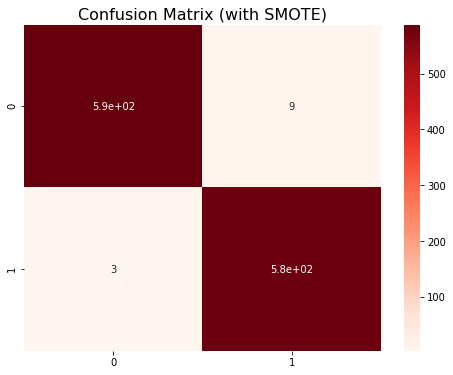

In [61]:
X_trainRF_bal, X_testRF_bal, y_trainRF_bal, y_testRF_bal = train_test_split(X_sm, y_sm, test_size=0.3, random_state=1)

model = RandomForestClassifier(random_state=42)
model.fit(X_trainRF_bal, y_trainRF_bal)
predsrf = model.predict(X_testRF_bal)

print("Random Forest Model Accuracy:",metrics.accuracy_score(y_testRF_bal, predsrf))
cm = confusion_matrix(y_testRF_bal, predsrf)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Reds');

# SVM(without balancing)

In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_trainSVM,X_testSVM,Y_trainSVM,Y_testSVM=train_test_split(text_tf,data['label'],test_size=0.3,random_state=1)

lin_model=SVC(kernel='linear')

lin_model.fit(X_trainSVM,Y_trainSVM)
ypred = model.predict(X_testSVM)

print("SVM Model Accuracy:",metrics.accuracy_score(Y_testSVM, ypred))


SVM Model Accuracy: 0.9937304075235109


# SVM(with balancing using SMOTE)

In [63]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(text_tf, data['label'])

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (2125, 19860)
Shape of X after SMOTE: (3940, 15279)

Balance of positive and negative classes (%):


positive    50.0
negative    50.0
Name: label, dtype: float64

In [64]:
X_trainSVM_bal,X_testSVM_bal,Y_trainSVM_bal,Y_testSVM_bal=train_test_split(X_sm,y_sm,test_size=0.3,random_state=1)

lin_model=SVC(kernel='linear')

lin_model.fit(X_trainSVM_bal,Y_trainSVM_bal)
svmpred = model.predict(X_testSVM_bal)

print("SVM Model Accuracy:",metrics.accuracy_score(Y_testSVM_bal, svmpred))

SVM Model Accuracy: 0.9898477157360406


# KNN(without balancing)

In [65]:
from sklearn.neighbors import KNeighborsClassifier as knn

X_trainKNN,X_testKNN,Y_trainKNN,Y_testKNN=train_test_split(text_tf,data['label'],test_size=0.3,random_state=1)

model=knn(n_neighbors=5)
model.fit(X_trainKNN,Y_trainKNN)
knnpred = model.predict(X_testKNN)

print("KNN Model Accuracy:",metrics.accuracy_score(Y_testKNN, knnpred))


KNN Model Accuracy: 0.9106583072100314


# KNN(with balancing using SMOTE)

In [66]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(text_tf, data['label'])

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (2125, 19860)
Shape of X after SMOTE: (3940, 15279)

Balance of positive and negative classes (%):


positive    50.0
negative    50.0
Name: label, dtype: float64

In [67]:
X_trainKNN_bal,X_testKNN_bal,Y_trainKNN_bal,Y_testKNN_bal=train_test_split(X_sm,y_sm,test_size=0.3,random_state=1)

model=knn(n_neighbors=5)
model.fit(X_trainKNN_bal,Y_trainKNN_bal)
knn_pred = model.predict(X_testKNN_bal)

print("KNN Model Accuracy:",metrics.accuracy_score(Y_testKNN_bal, knn_pred))


KNN Model Accuracy: 0.5093062605752962


# COMPARISON TABLE OF ACCURACIES OF DIFFERENT MODELS

In [68]:
acc={'Without Balancing':[metrics.accuracy_score(y_testNB, predicted),metrics.accuracy_score(Y_testLOG, y_pred),
                         metrics.accuracy_score(Y_testRF, preds),metrics.accuracy_score(Y_testSVM, ypred),
                         metrics.accuracy_score(Y_testKNN, knnpred)],
     'With Balancing(SMOTE)':[metrics.accuracy_score(y_testNB_bal, predict),metrics.accuracy_score(y_testLOG_bal, pred),
                             metrics.accuracy_score(y_testRF_bal, predsrf),metrics.accuracy_score(Y_testSVM_bal, svmpred),
                             metrics.accuracy_score(Y_testKNN_bal, knn_pred)]}

table=pd.DataFrame(acc, columns=['Without Balancing', 'With Balancing(SMOTE)'], index=['Mutinomial Naive Bayes',
                                'Logistic Regression','Random Forest','SVM','KNN'])

print(table)

                        Without Balancing  With Balancing(SMOTE)
Mutinomial Naive Bayes           0.921630               0.959391
Logistic Regression              0.909091               0.959391
Random Forest                    0.909091               0.989848
SVM                              0.993730               0.989848
KNN                              0.910658               0.509306
